# RLC Resonance Curves

In the previous laboratory section, we found that RLC circuits when placed in series, results with what a known as a natural frequency, where the natural frequecy is,

$$\omega_{0} = \frac{1}{\sqrt{LC}}$$

When driven, at the natural frequency, resonance occurs which means that the is a maximal power tranmission in the circuit. We want to explore how as we approach the natural frequency of the circuit, power tramissability increases and/or decreases. For this, we will drive an RLC circuit to its theoretical natural frequnecy and beyond. The ratio of resonator's center frequency versus the bandwidth of transmission,


$$Q_{factor} = \frac{w0}{\Delta \omega} = \frac{f_{0}}{\Delta f}$$

For an RLC circuit in series, the equivalent result is in terms of fundamental RLC components is,

$$Q_{factor} = \frac{w0}{\Delta \omega} = \frac{1}{R}\sqrt{\frac{L}{C}}$$

where, 

$$\Delta \omega= \frac{R}{L}$$


Additionally, when we perform this resonant frequnecy scan, we arrive at the solution for the resonance curve, known as a *Lorentzian* or *Cauchy* distribution.

$$P(f) = \frac{A_0 \left( \Delta f^2 f_0^2 - \frac{\Delta f^4}{4} \right)}{(f^2 - f_0^2)^2 + \Delta f^2 f^2}$$

where,

$$f_{0} = \frac{\omega_{0}}{2\pi}$$

is the natural frequency in units of Hz, $Δf$ is the bandwith in units of Hz, and $A_{0}$ is the maximum amplitude of the system.

## 1.1 Example dataset

We will go through how to analyze an example data set. Here we have conducted an resonance curve experiment with an RLC circuit in series with the following parameters.

$$ R = 8\Omega$$
$$ L = 8.5 mH$$
$$ C = 0.1\mu F$$

**and we scanned a frequency range of 0 - 10 kHz.**
We begin by loading in our data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

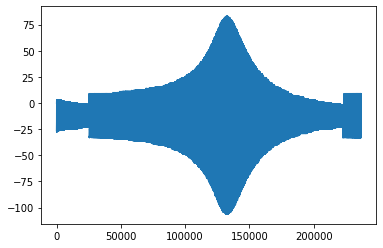

In [ ]:
data = np.loadtxt('/content/RLC_frequency_sweep.csv', delimiter = ',', skiprows = 1)
plt.plot(data)

Next we want to trim our data such that we start our analysis when the frequency was zero and ended at 10 kHz.

Text(0.5, 0, 'Frequency [Hz]')

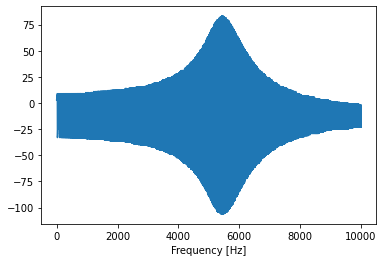

In [ ]:
# Cutoff data points such that the data set starts at 0 Hz and ends at 10 kHz.
lower_f = 25000
upper_f = 222500

data_trimmed = data[lower_f:upper_f]

# Create a frequency array with the same number of data points, ranged from 0-10 kHz.
frequencies = np.linspace(0, 10000, len(data_trimmed))

plt.plot(frequencies, data_trimmed)
plt.xlabel('Frequency [Hz]')

Futhermore, we want to calculate the ratio of the **power** transmissiblity, so we will normalize and square our voltage reading values.

Text(0.5, 0, 'Frequency [Hz]')

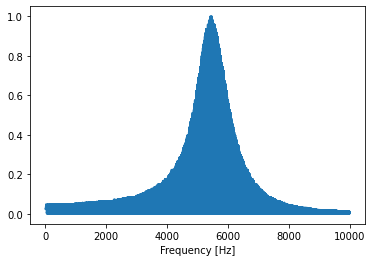

In [ ]:
power_data = (data_trimmed - np.mean(data_trimmed))**2
power_data_norm = power_data/np.max(power_data)
plt.plot(frequencies, power_data_norm)
plt.xlabel('Frequency [Hz]')

Now, let's define our Lorentzian fucntion

$$P(f) = \frac{A_0 \left( \Delta f^2 f_0^2 - \frac{\Delta f^4}{4} \right)}{(f^2 - f_0^2)^2 + \Delta f^2 f^2}$$

In [ ]:
def lorentzian(f, parameters):

  # create an input parameters array with the amplitude, natural frequecy, and the bandwith.

  A0 = 
  f0 = 
  bw = 

  # Define the lore
  Lor = 
  return Lor


In [ ]:
#Define your RLC constants
R = 8
L = 8.5*10**-3
C = 0.1*10**-6


# Calculate the natural frequency in rad/s and the Q factor
w0 = 
Q = 

# Calculate the bandwith of the RLC circuit for the given RLC constants
bw = 

Now that we have defined our Lorentzian function, let's plot our experimental data and theoretical models together.

Text(0.5, 0, 'Frequency [Hz]')

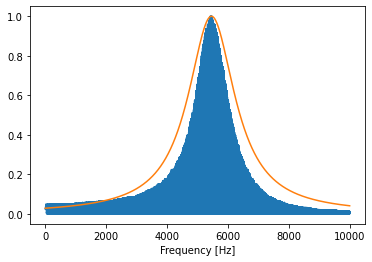

In [ ]:
A0 = 
f0 = 
bw = 

input_params = [A0, f0, bw]

# Call the Lorentzian function and feed it the theoretical values of amplitude, natural frequency, and bw as fucntion of frequency.
lor_theoretical = 


# Plot the experimental data set and the theoretical models together.
plt.xlabel('Frequency [Hz]')


In [ ]:
def lorentzian_residuals(params, data, x):
  residuals=np.abs(data-lorentzian(x,params))
  return -residuals

# import least squares fit
from scipy.optimize import least_squares

# Perform least squares fit
res_lsq_lorentzian = least_squares(lorentzian_residuals, input_params, args = (power_data_norm, frequencies))

best_fit_parameters = res_lsq_lorentzian['x']
print(best_fit_parameters)

[4.87962201e-01 5.44834433e+03 6.53928779e+02]


Finally, after performing a least squares fit your your data, plot the theoretical model, experimental data, and your experimental fit on a single plot.

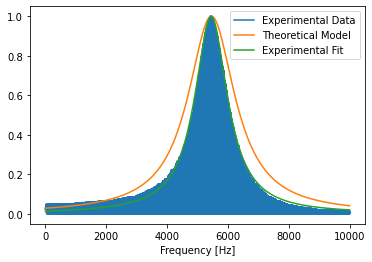

In [ ]:
# Using the best fit parameters from the least squares fit, call the Lorentzian function again to plot the function. 
exp_lorentzian_fit = lorentzian(frequencies, best_fit_parameters)

# Plot the experimental data, theoretical model, and experimental fit together on 1 graph.
plt.plot(frequencies, power_data_norm, label='Experimental Data')
plt.plot(frequencies, lor_theoretical, label='Theoretical Model')
plt.plot(frequencies, exp_lorentzian_fit/np.max(exp_lorentzian_fit), label='Experimental Fit')
plt.xlabel('Frequency [Hz]')
plt.legend()